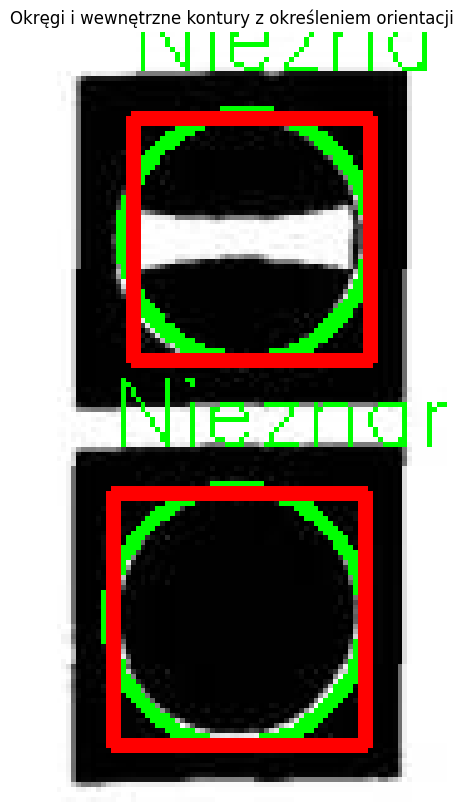

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_horizontal_or_vertical(contour):
    """Function to check if the contour is horizontal or vertical."""
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    if aspect_ratio > 1.5:
        return "Poziomy"
    elif aspect_ratio < 0.67:
        return "Pionowy"
    else:
        return "Nieznany"


image_path = 'scheme001.jpg'
image = cv2.imread(image_path)


if image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


filtered = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the circle
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
        # Mask the region inside the circle
        mask = np.zeros_like(gray)
        cv2.circle(mask, (i[0], i[1]), i[2], 255, thickness=-1)
        
        # Find contours within the circle mask
        masked_image = cv2.bitwise_and(gray, gray, mask=mask)
        _, binary = cv2.threshold(masked_image, 127, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Find the largest contour inside the circle
        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)
            if w * h > 100:  # Ensure the contour is significant
                # Draw the bounding rectangle around the largest contour
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
                
                # Determine the orientation
                orientation = is_horizontal_or_vertical(largest_contour)
                cv2.putText(image, orientation, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)
            else:
                cv2.putText(image, "Brak ksztaltu", (i[0] - 40, i[1] - i[2] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
        else:
            cv2.putText(image, "Brak ksztaltu", (i[0] - 40, i[1] - i[2] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)

# Display the final image
plt.figure(figsize=(10, 10))
plt.title('Okręgi i wewnętrzne kontury z określeniem orientacji')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
